# Explore here

In [1]:
import os
import requests
import pandas as pd

# ¿Qué quiero resolver?
'''
 id -> no es info de la que sacar conclusiones                     
 name                           
 host_id -> no es info de la que sacar conclusiones                        
 host_name                     
 neighbourhood_group -> ¿Cuales son las diferencias de precios entre grupos de barrios y barrios?¿Qué barrios son mas populares?           
 neighbourhood                  
 latitude -> ¿Hay áreas con una mayor densidad de propiedades?¿Cómo varía el precio y la disponibilidad según la ubicación geográfica?                       
 longitude                       
 room_type                      
 price -> se puede realizar un análisis del precio ¿qué barrios tienen precios mas altos y mas bajos? ¿Hay relación entre precio y disponibilidad?¿Cómo varían los precios según el tipo de habitación?                  
 minimum_nights                    
 number_of_reviews                
 last_review -> ¿existe alguna relación entre la disponibilidad, la última reseña y el precio?                   
 reviews_per_month        
 calculated_host_listings_count -> ¿Cuántas propiedades tiene cada anfitrión?¿qué anfitriones tienen las propiedades con mejores reseñas?
 availability_365 -> ¿cómo varía la disponibilidad según el tipo de habitación y barrio?
'''
#Voy a hacer análisis del precio
# 1. Cargar conjunto de datos
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# 2. Exploración y limpieza de datos
#   Dimensiones e información
total_data.shape #48895 filas y 16 columnas

(48895, 16)

In [3]:
# Información 
total_data.info()
# Las columnas 1, 3, 12 y 13 tienen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#   Eliminación de duplicados
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()
# No hay duplicados

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#   Eliminación de información irrelevante 
total_data.drop(["id", "name", "host_id"], axis = 1, inplace = True)
total_data.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64


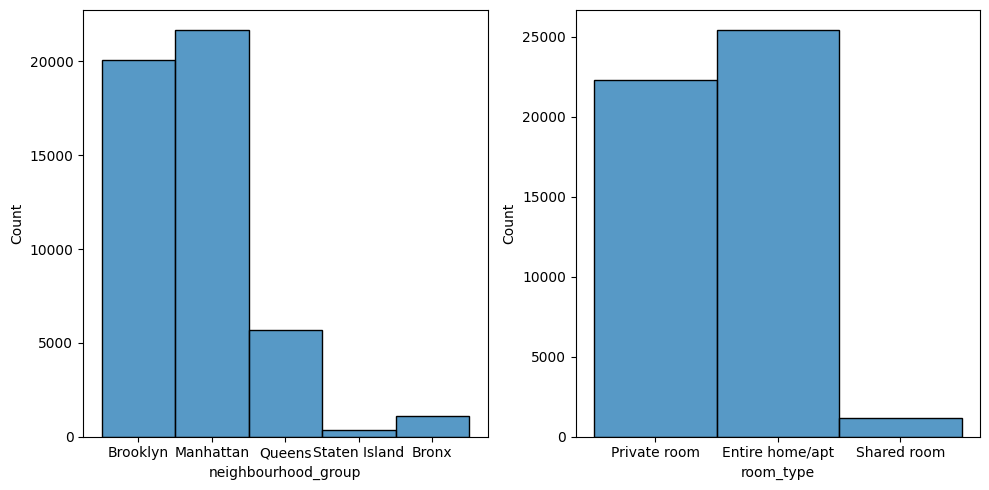

In [6]:
# 3. Análisis de variables univariante
import matplotlib.pyplot as plt 
import seaborn as sns

#   Variables categóricas -> histogramas
#       No todas las variables se pueden representar mediante histogramas por tener demasiados tipos de valores
name_counts = total_data['host_name'].value_counts()
print(name_counts) # Hay 11452 anfitriones
neighbourhood_counts = total_data['neighbourhood'].value_counts()
print(neighbourhood_counts) # Hay 221 barrios
fig, axis = plt.subplots(1, 2, figsize = (10, 5))

# Histograma múltiple
#"host_name" -> existen demasiados nombres como para crear hisograma

sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = total_data, x = "room_type")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# Conclusiones: 
#   - El barrio donde existen mas pisos anunciados es Manhattan seguido de Brooklyn. El que menos Staten Island
#   - La mayoría de pisos se alquilan enteros, seguidos de habitaciones privadas. Las habitaciones compartidas lo que menos

17533


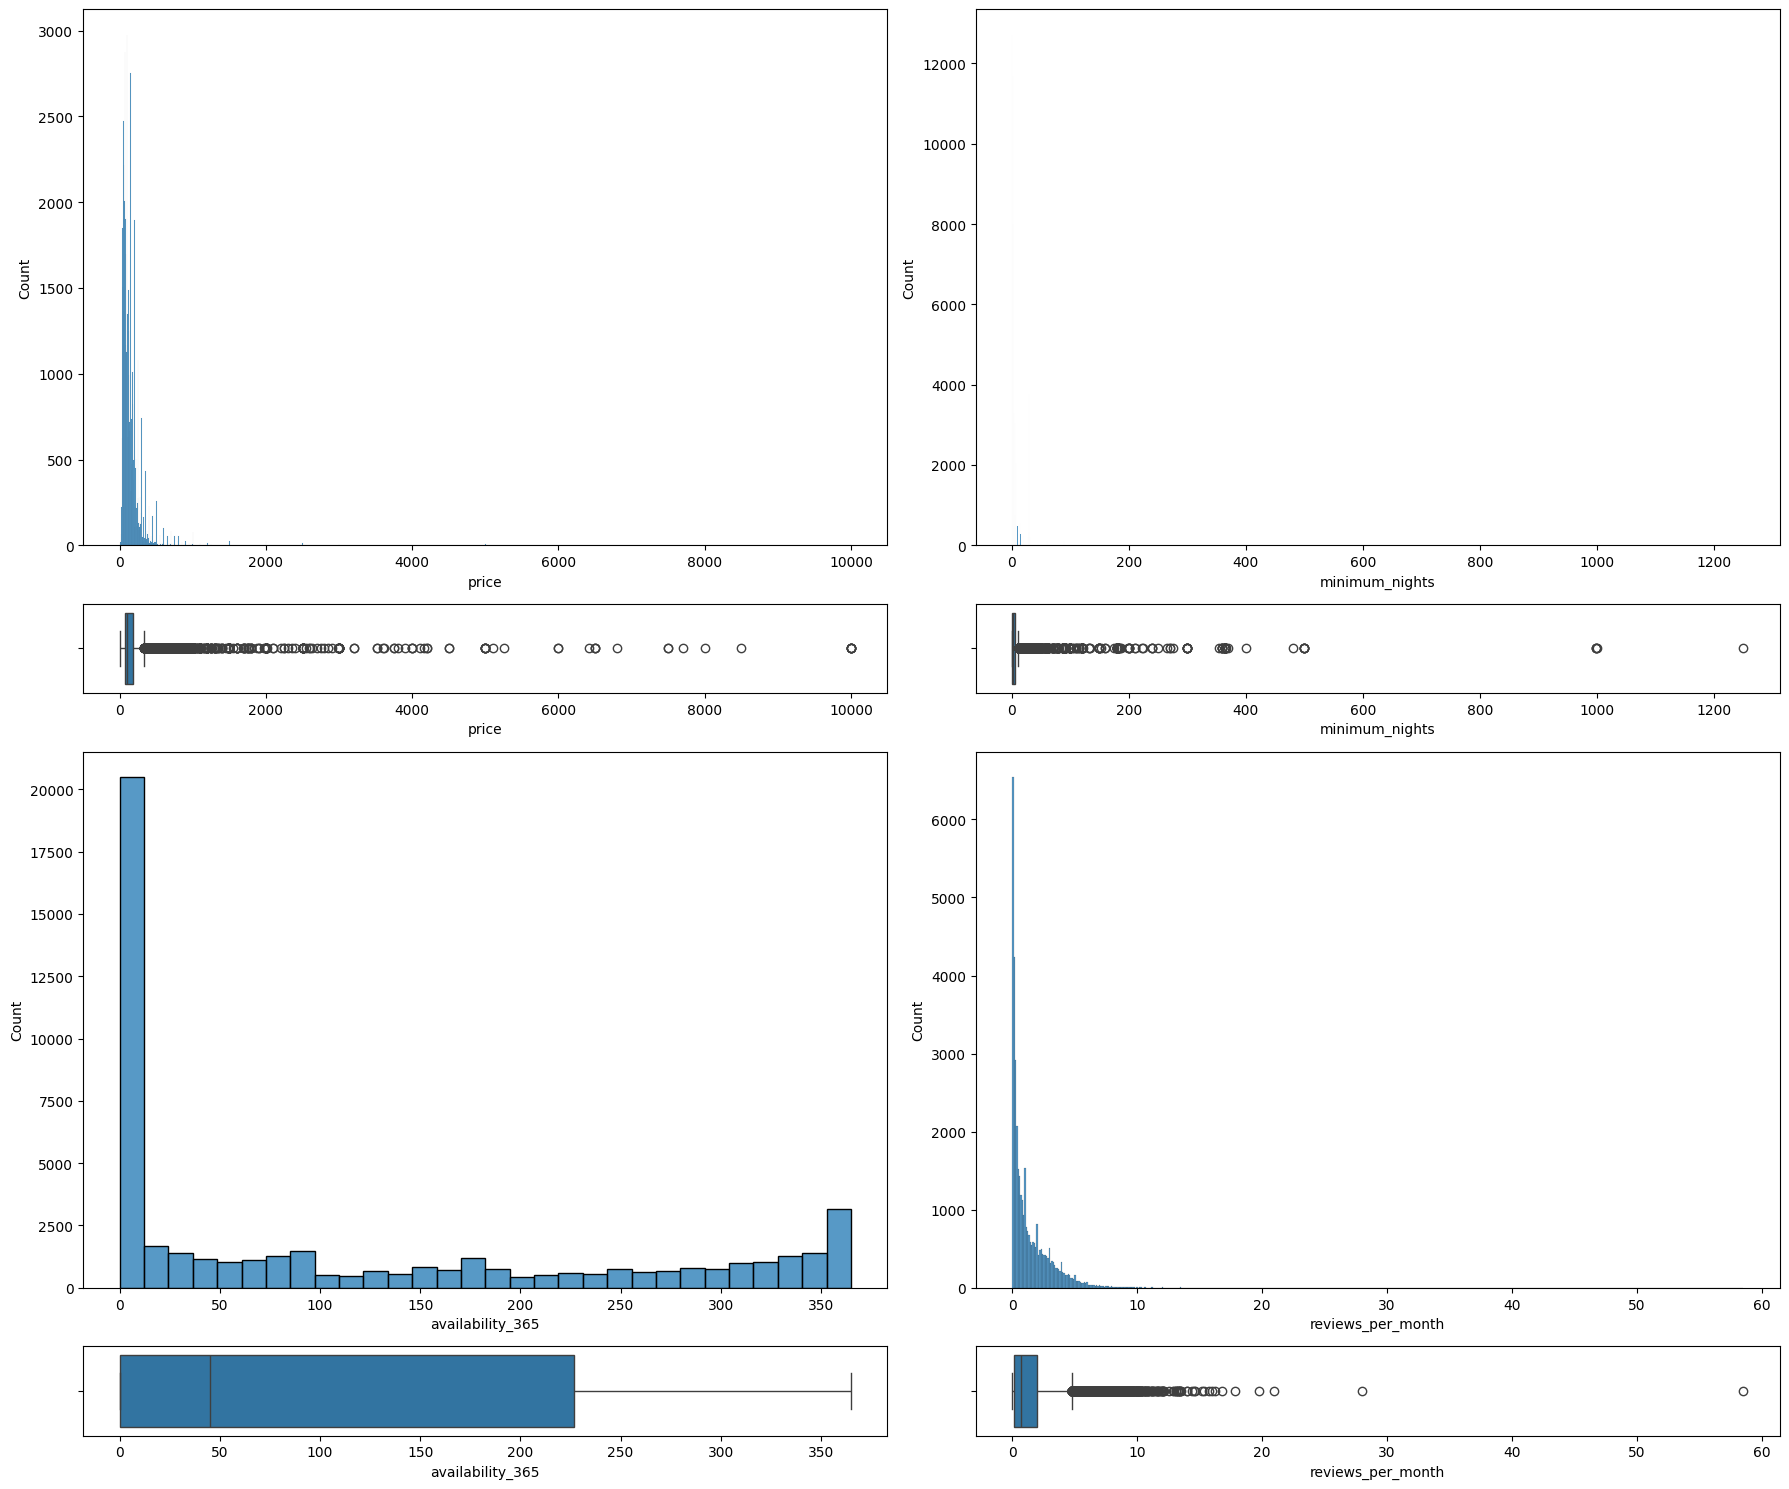

In [45]:
#   Variables numéricas -> histogramas + diagramas de cajas
fig, axis = plt.subplots(4, 2, figsize = (18, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price") # Hay un montón de datos atípicos
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights") # Hay un montón de datos atípicos
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = total_data, x = "availability_365")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "availability_365")
sns.histplot(ax = axis[2, 1], data = total_data, x = "reviews_per_month") # Hay datos atípicos raros
sns.boxplot(ax = axis[3, 1], data = total_data, x = "reviews_per_month")

# ¿Existen pisos cuya disponibilidad es de 0 días? -> los elimino porque para hacer un análisis del precio pueden meter ruido
no_dispo = total_data['availability_365'] == 0
suma_no_dispo = no_dispo.sum()
print(suma_no_dispo) # Hay 17533 pisos que no han tenido disponibilidad en todo el año. Esto es el 35%

# En las noches mínimas existen datos atípicos demasiado altos -> a estudiar cuando llegue s su punto
# Ajustar el layout
plt.tight_layout()
#fig.delaxes(axis[2, 1])
#fig.delaxes(axis[3, 1])

# Mostrar el plot
plt.show()

In [7]:
# Elimino los pisos de disponibilidad 0 al no aportar nada a un análisis de los precios
total_data = total_data[total_data['availability_365'] != 0]
print(total_data.shape)
total_data.head()

(31362, 13)


,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


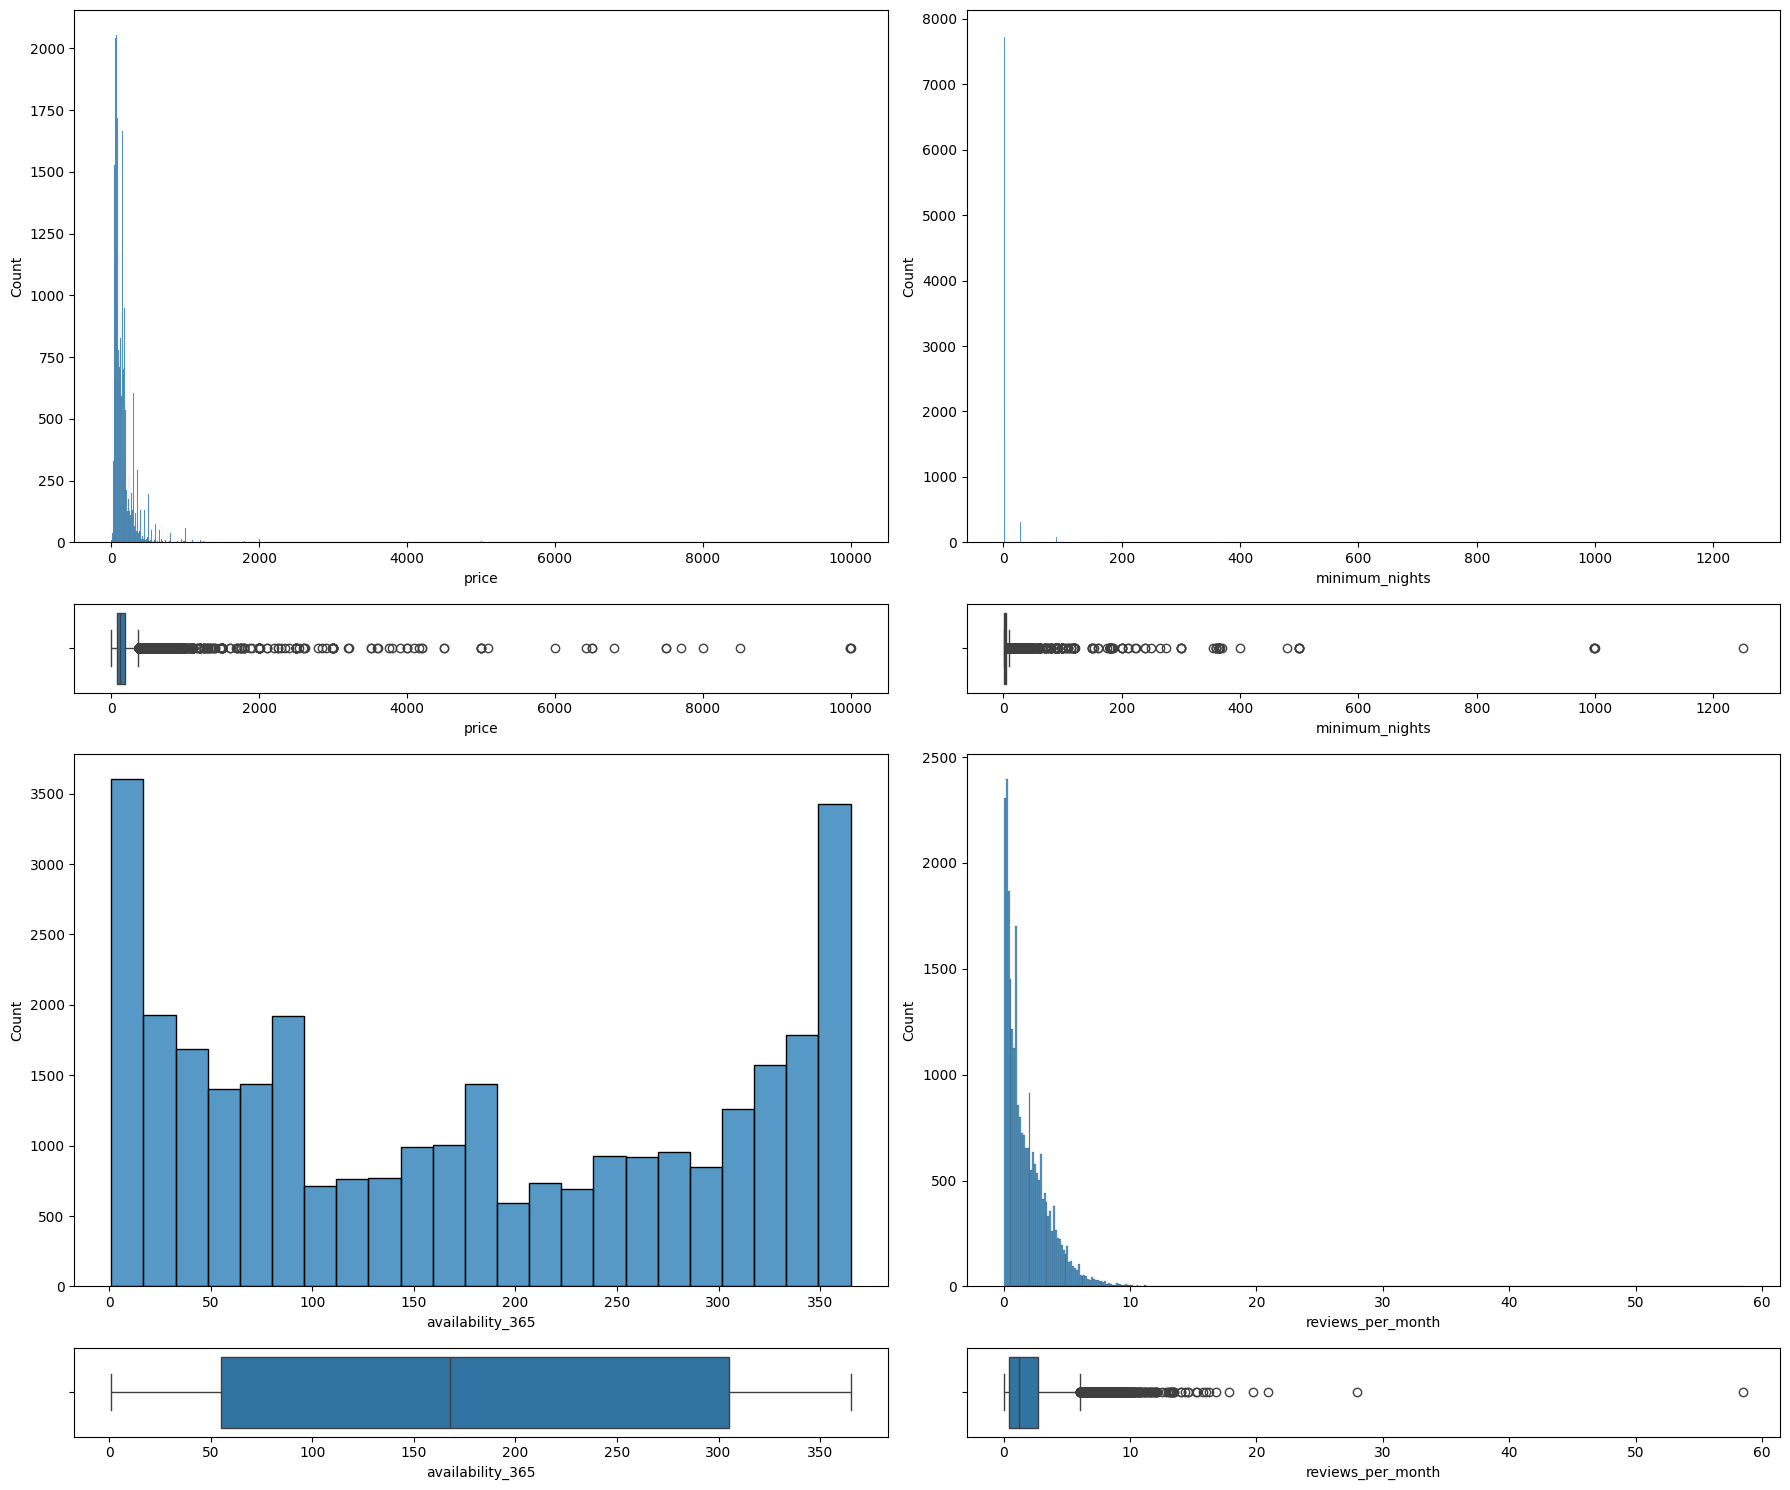

In [8]:
# Vuelvo a representar los histogramas de las variables categóricas para ver como han cambiado los datos con esta modificación
fig, axis = plt.subplots(4, 2, figsize = (18, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price") # Hay un montón de datos atípicos
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights") # Hay un montón de datos atípicos
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = total_data, x = "availability_365")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "availability_365")
sns.histplot(ax = axis[2, 1], data = total_data, x = "reviews_per_month")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "reviews_per_month")


plt.tight_layout()

plt.show()

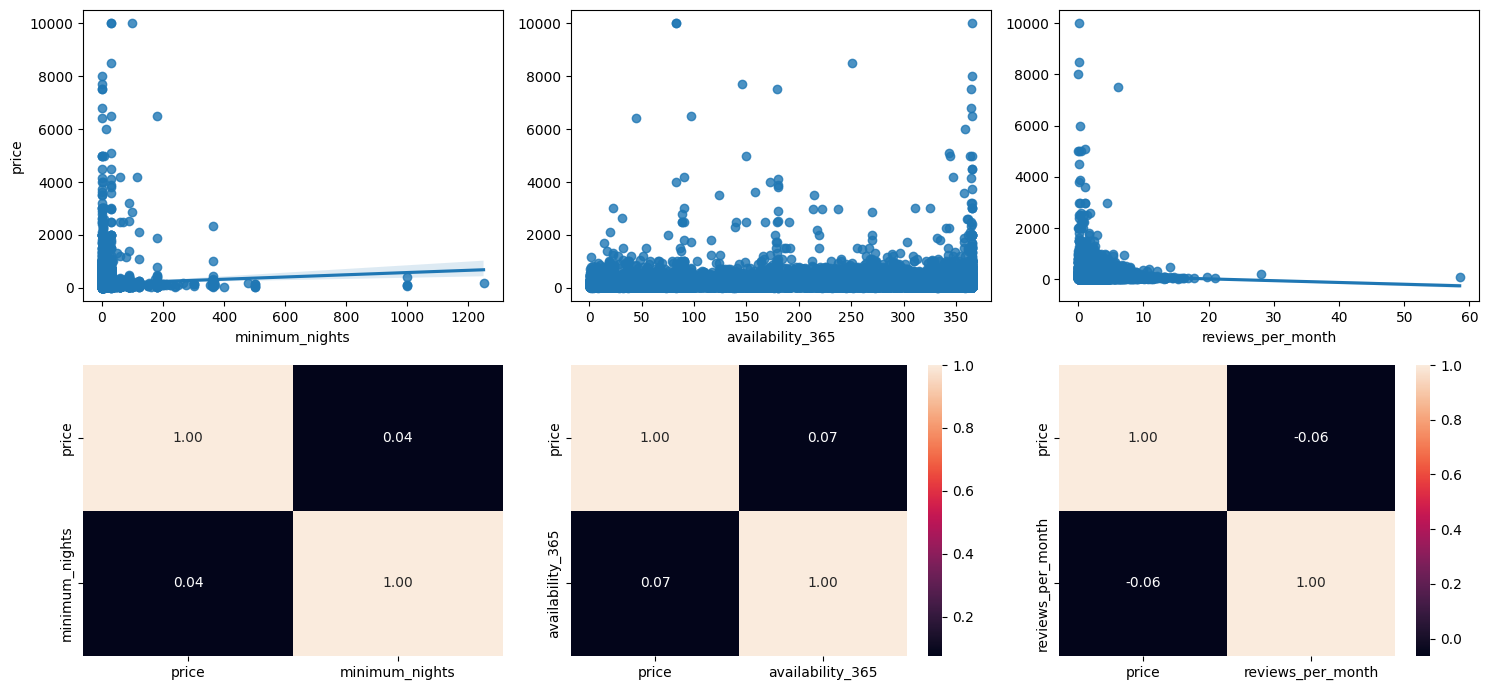

In [11]:
# 4. Análisis de variables multivariante
#   Numérico-numérico
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "reviews_per_month", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# Según las gráficas, el precio no guarda relación con las noches mínimas, con la disponibilidad ni con las reviews por mes

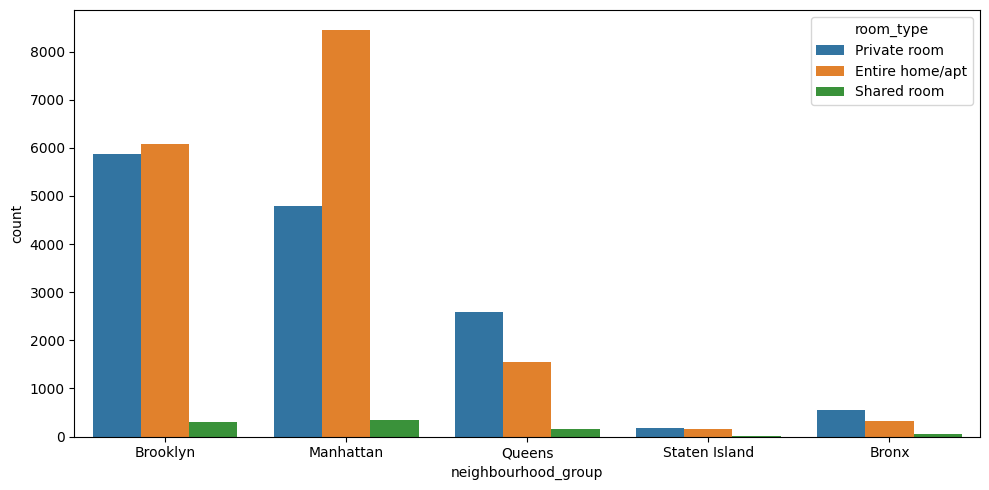

In [13]:
#   Categórico-categórico
fig, ax = plt.subplots(figsize=(10, 5))

# Crear el gráfico countplot
sns.countplot(ax=ax, data=total_data, x="neighbourhood_group", hue="room_type")


plt.tight_layout()

plt.show()

#Manhatan es el barrio que mas alquila inmuebles enteros

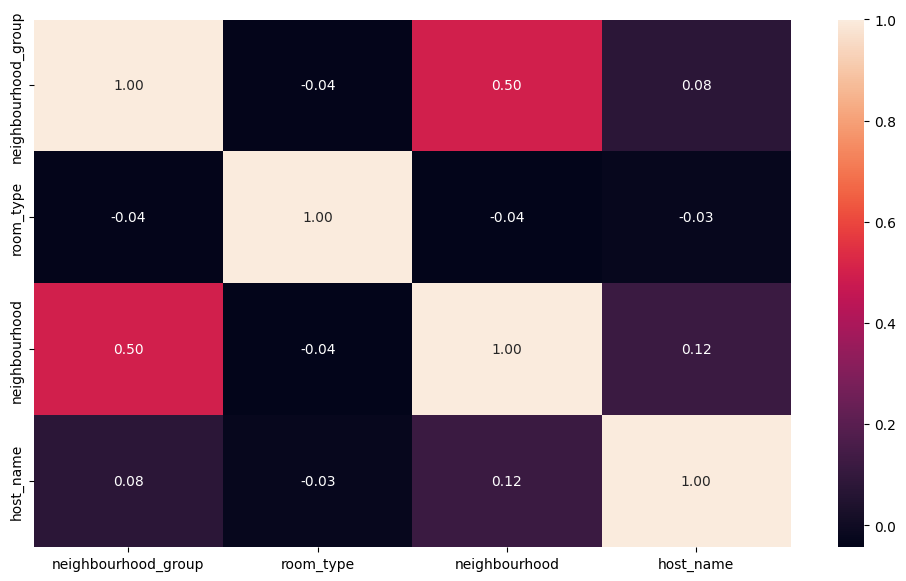

In [14]:
#   Análisis de correlaciones
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["host_name"] = pd.factorize(total_data["host_name"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood_group","room_type","neighbourhood","host_name"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# Existe alta correlación entre el grupo de barrios y los barrios, lo cuál es lógico

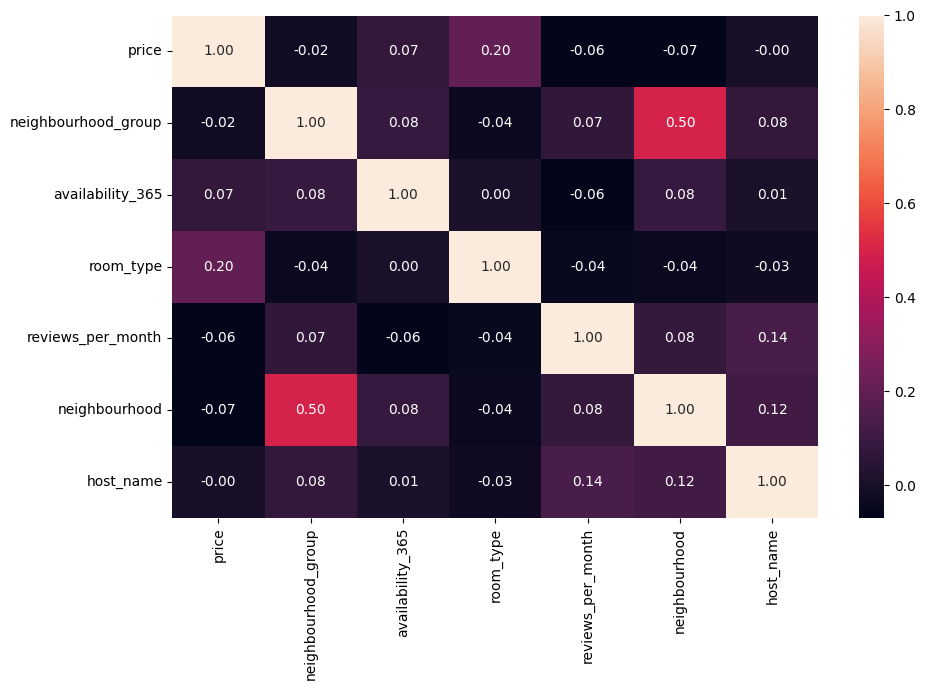

In [15]:
#   Análisis numérico-categórico -> cálculo de correlaciones
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["price","neighbourhood_group","availability_365","room_type","reviews_per_month","neighbourhood","host_name"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

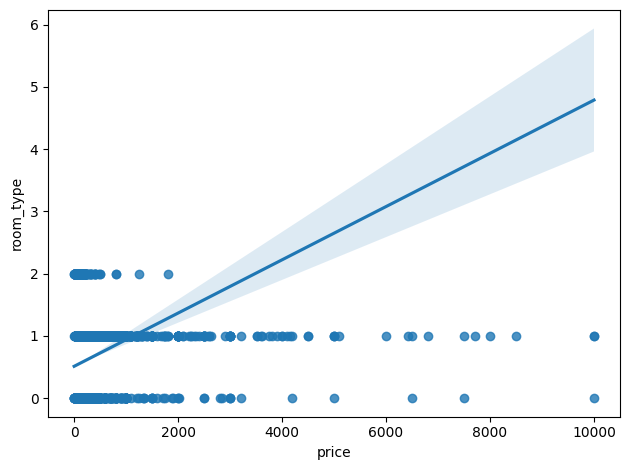

In [16]:
#   Existe algo de correlación entre el precio y el tipo de habitaciones. El precio aumenta cuando las habitaciones son privadas o se alquila el piso entero.
#   price-room-type
#fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.regplot(data = total_data, x = "price", y = "room_type")


plt.tight_layout()

plt.show()

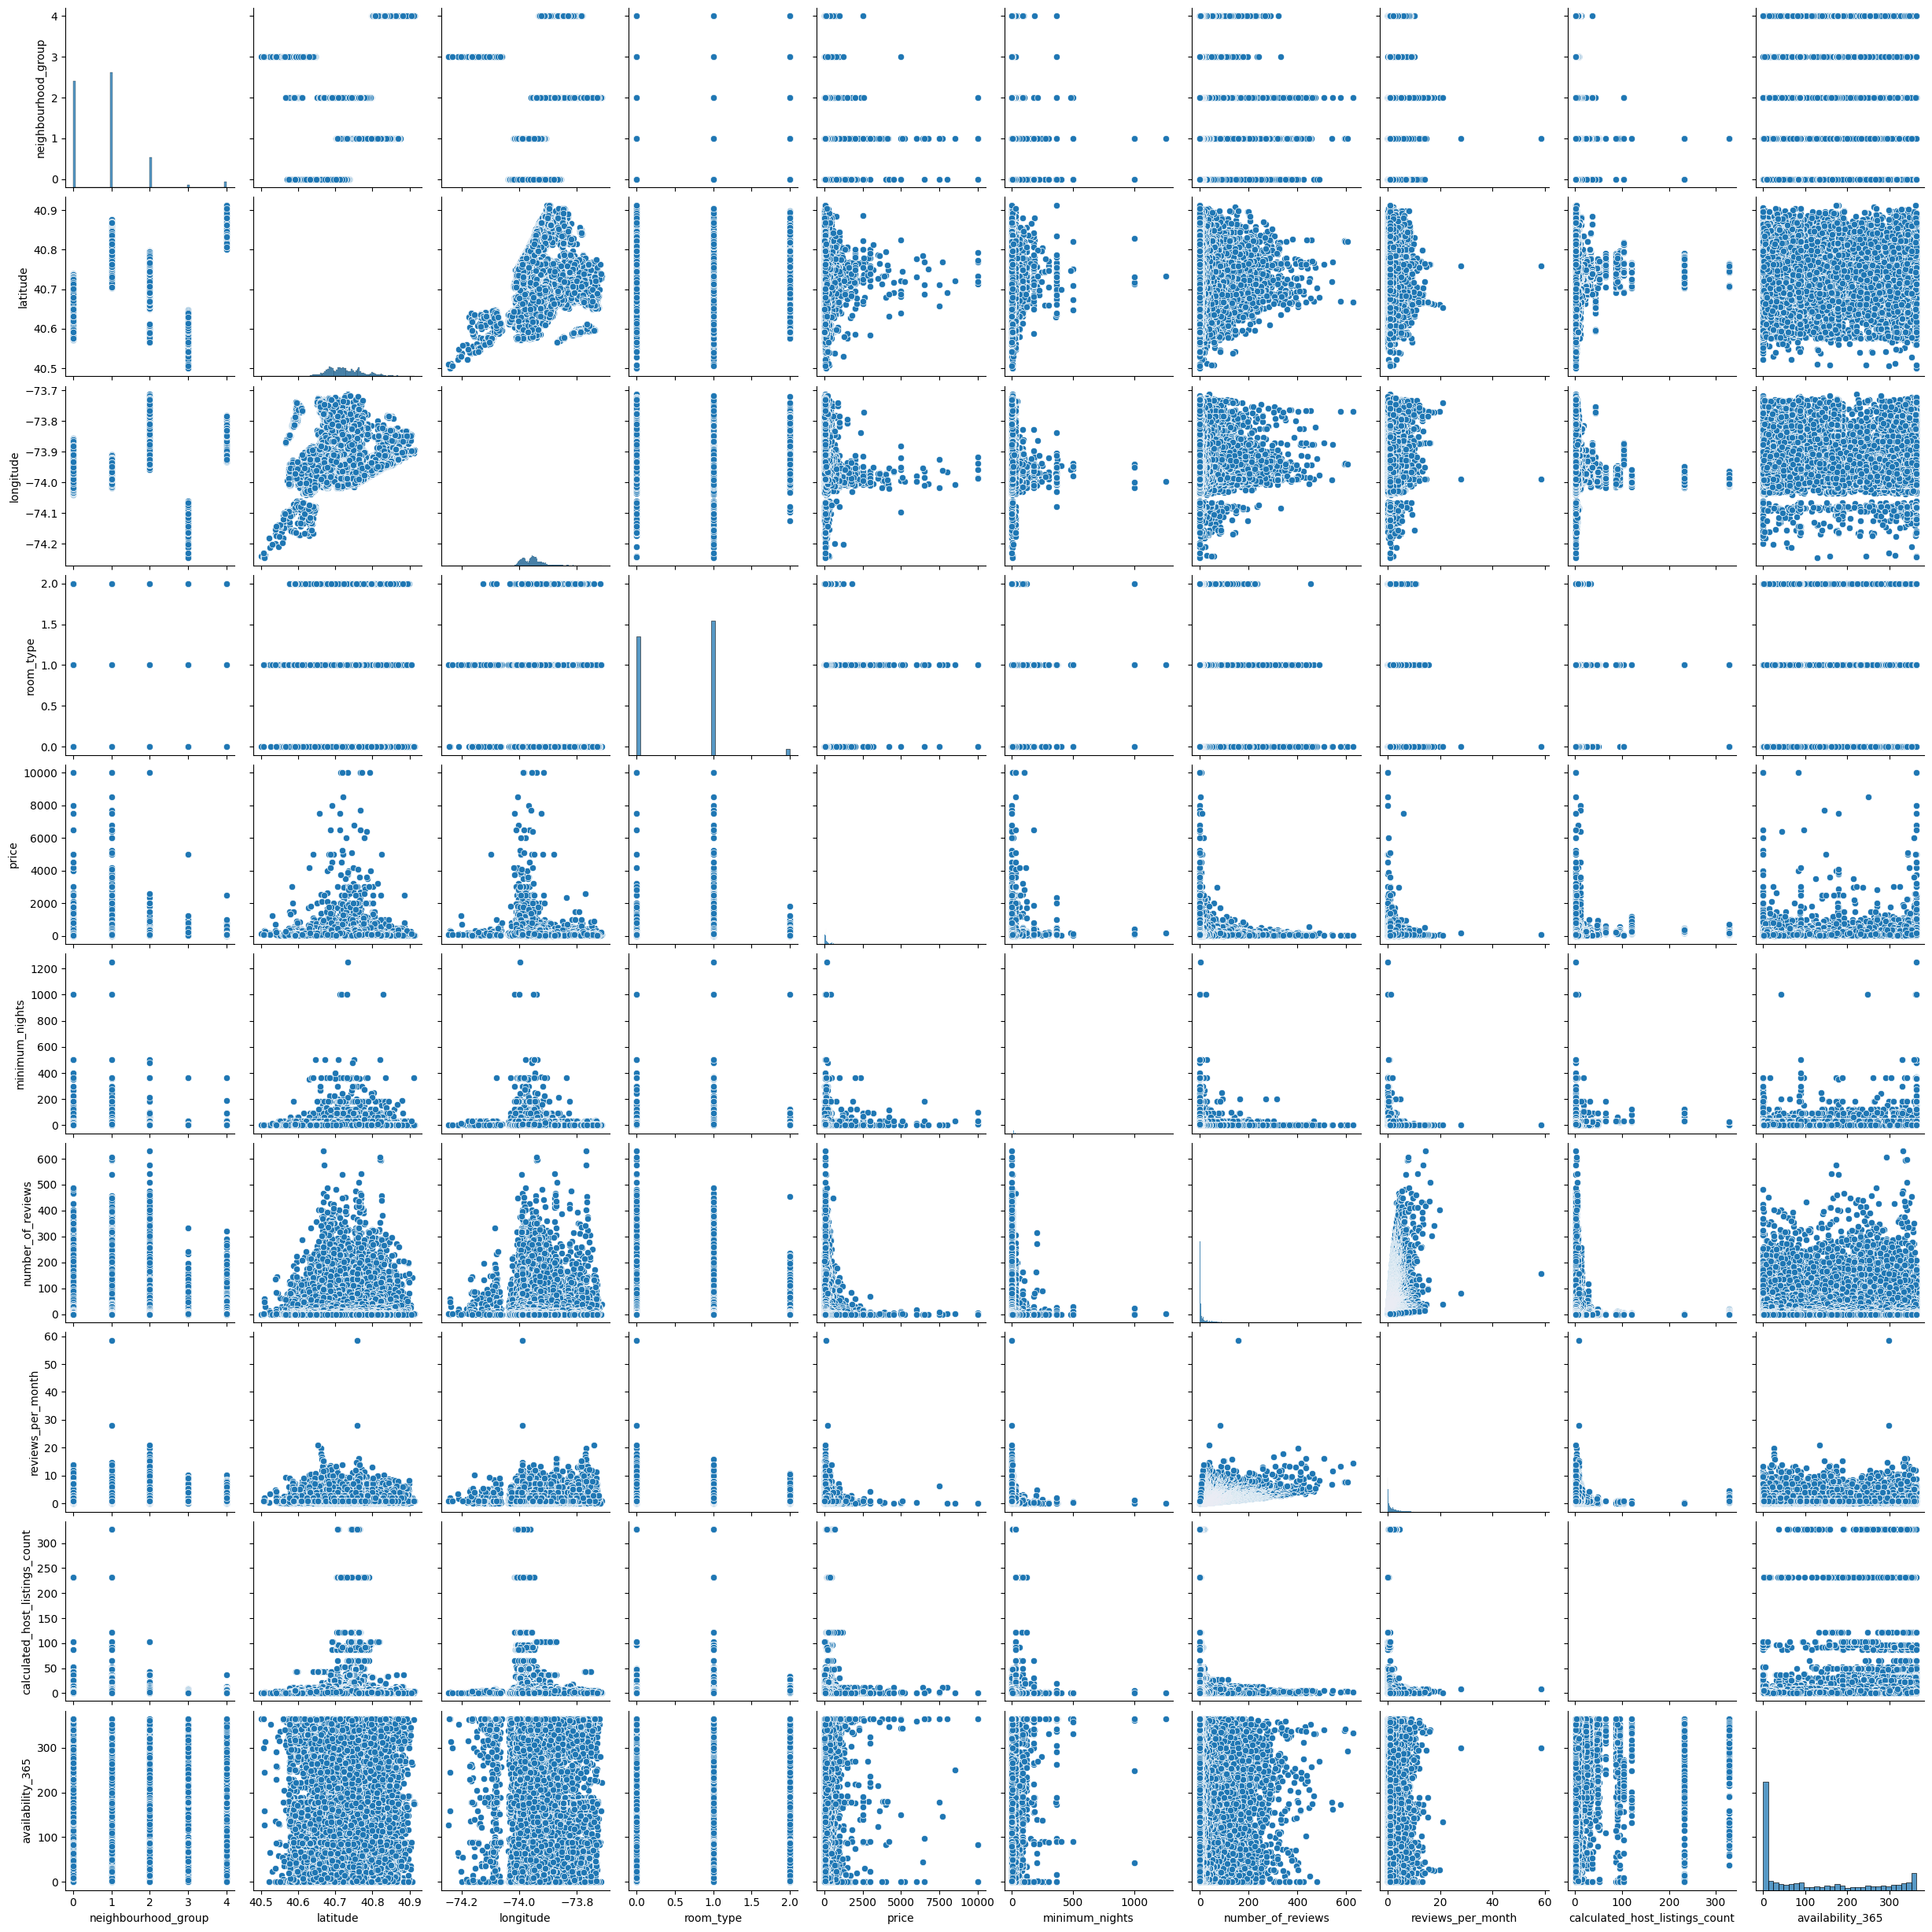

In [13]:
sns.pairplot(data = total_data)

In [17]:
total_data.describe()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,26155.000000,31362.000000,31362.000000
mean,2336.281264,0.854665,33.815414,40.728401,-73.948745,0.582265,162.050475,8.338658,31.852369,1.810126,10.334067,175.831994
std,2298.333769,0.900764,38.106746,0.056561,0.051397,0.546206,254.425463,23.836703,51.636804,1.805707,40.700398,126.187636
min,-1.000000,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,438.000000,0.000000,9.000000,40.688383,-73.983270,0.000000,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,1409.500000,1.000000,19.000000,40.723720,-73.954110,1.000000,111.500000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3901.750000,1.000000,44.000000,40.763030,-73.930132,1.000000,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,8213.000000,4.000000,217.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [25]:
# 5. Ingeniería de características
#   Análisis de outliers -> en las variables numéricas teníamos bastantes outliers (precio y noches mínimas)
#Precio -> me invento que AirBnb tiene una norma que limita el precio a 3000 dólares la noche
total_data = total_data[total_data['price'] < 500]
#Noches mínimas -> me invento que AirBnb tiene una norma que los usuarios pueden seleccionar como maximo 30 días minimos (1 mes)
total_data = total_data[total_data['minimum_nights'] < 30]
total_data.shape

(26461, 13)

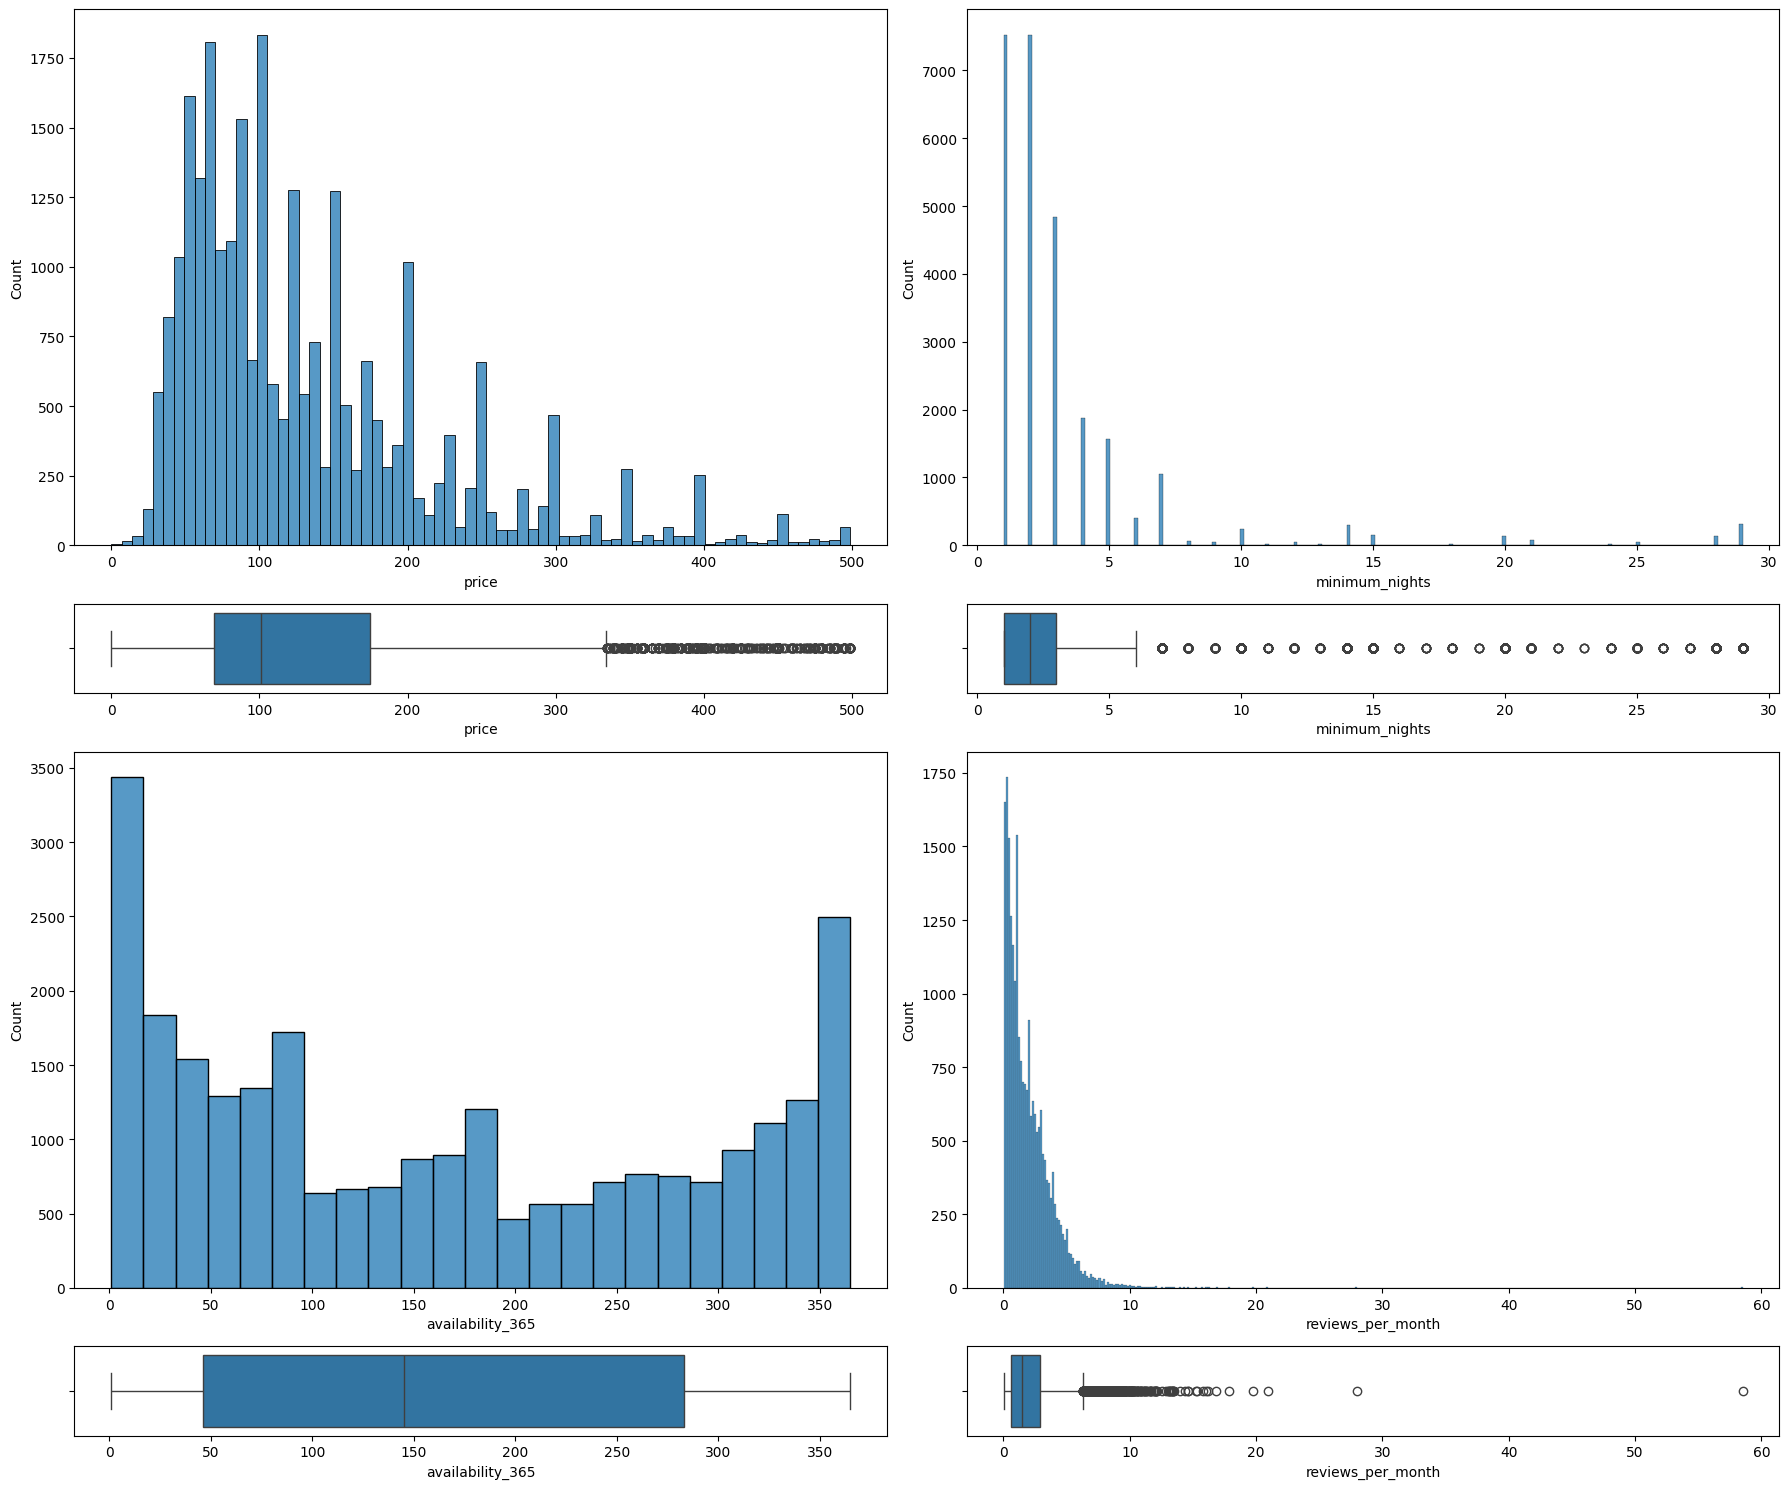

In [26]:
# Vamos a ver cómo quedan ahora los histogramas con la eliminación de esos outliers
fig, axis = plt.subplots(4, 2, figsize = (18, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price") # Hay un montón de datos atípicos
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights") # Hay un montón de datos atípicos
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = total_data, x = "availability_365")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "availability_365")
sns.histplot(ax = axis[2, 1], data = total_data, x = "reviews_per_month")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "reviews_per_month")


plt.tight_layout()

plt.show()

# Nuevas conclusiones -> los propietarios permite las estancias cortas

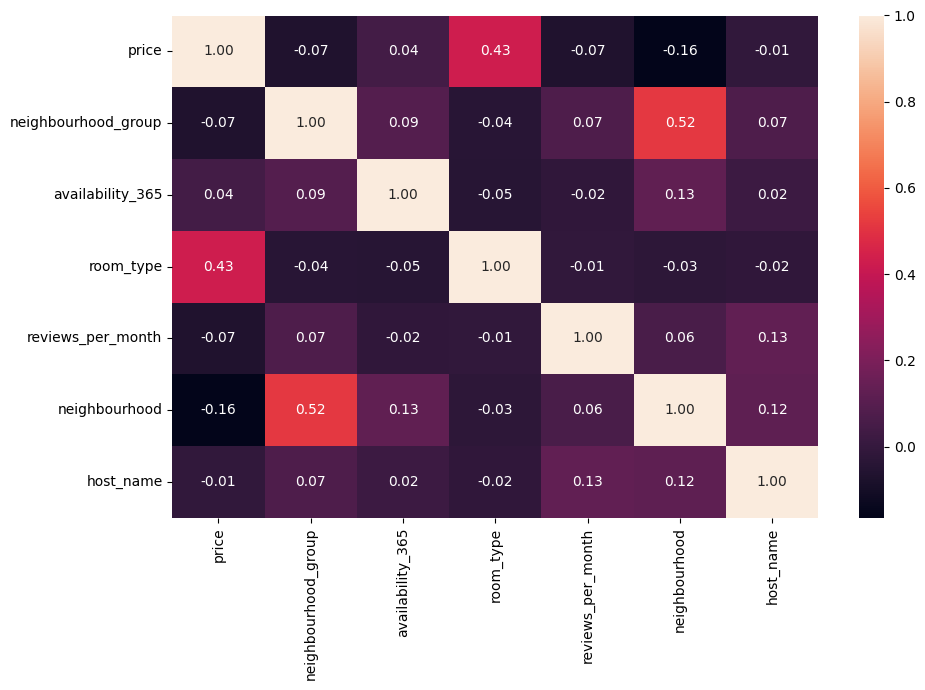

In [27]:
# Repito correlaciones por si han cambiado después de la limpieza de outliers
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["price","neighbourhood_group","availability_365","room_type","reviews_per_month","neighbourhood","host_name"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# El precio está relacionado con el tipo de habitación

In [28]:
#   Análisis de valores faltantes ->sólo faltan en las reviews y no son importantes para hacer un análisis del precio

total_data.isnull().sum().sort_values(ascending=False)

last_review                       3349
reviews_per_month                 3349
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [16]:
#   Inferencia de nuevas características -> no necesario en este caso

In [29]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26461 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       26461 non-null  int64  
 1   neighbourhood_group             26461 non-null  int64  
 2   neighbourhood                   26461 non-null  int64  
 3   latitude                        26461 non-null  float64
 4   longitude                       26461 non-null  float64
 5   room_type                       26461 non-null  int64  
 6   price                           26461 non-null  int64  
 7   minimum_nights                  26461 non-null  int64  
 8   number_of_reviews               26461 non-null  int64  
 9   last_review                     23112 non-null  object 
 10  reviews_per_month               23112 non-null  float64
 11  calculated_host_listings_count  26461 non-null  int64  
 12  availability_365                26461

In [30]:
#   Escalado de valores
# División del conjunto en train y test
from sklearn.model_selection import train_test_split

# El precio se ha deducido que sólo guarda relación con el tipo de habitación y más débilmente con el barrio
num_variables = ["neighbourhood", "room_type"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood,room_type
18846,29,1
17600,33,1
20527,11,1
27474,142,0
33342,15,1


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood,room_type
18846,-0.161867,0.814873
17600,-0.060161,0.814873
20527,-0.619543,0.814873
27474,2.711323,-0.988496
33342,-0.517837,0.814873


In [ ]:
# 6. Selección de características
